In [1]:
#pip install yfinance

In [2]:
import yfinance as yf # to import data from yahoo of finance

In [6]:
# to download the data of bitcoin 
import yfinance as yf

btc = yf.download("BTC-USD", period="1d", interval="1m")

[*********************100%***********************]  1 of 1 completed


In [12]:
btc.columns = btc.columns.get_level_values(0)

In [7]:
btc.isnull().sum() # to check if there is any null value in the data

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

In [8]:
btc.to_csv('btc.csv') # to save the data in csv file

In [9]:
btc.info() # to get the information about the data like number of rows, columns, data types etc.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 540 entries, 2026-02-23 00:00:00+00:00 to 2026-02-23 13:43:00+00:00
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   540 non-null    float64
 1   (High, BTC-USD)    540 non-null    float64
 2   (Low, BTC-USD)     540 non-null    float64
 3   (Open, BTC-USD)    540 non-null    float64
 4   (Volume, BTC-USD)  540 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 25.3 KB


In [13]:
series = btc['Close']

In [21]:
btc['Returns'] = btc['Close'].pct_change()
btc['MA_7'] = btc['Close'].rolling(7).mean()
btc['Volatility'] = btc['Returns'].rolling(7).std()
btc.dropna(inplace=True)

In [10]:
btc.describe() # to get the statistical summary of the data

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,65716.760359,65716.760359,65716.760359,65716.760359,6.966138e+07
std,749.651901,749.651901,749.651901,749.651901,1.340456e+08
min,64400.738281,64400.738281,64400.738281,64400.738281,0.000000e+00
25%,64998.885742,64998.885742,64998.885742,64998.885742,0.000000e+00
50%,65750.367188,65750.367188,65750.367188,65750.367188,1.069466e+07
75%,66268.859375,66268.859375,66268.859375,66268.859375,8.319232e+07
max,67633.906250,67633.906250,67633.906250,67633.906250,1.352477e+09


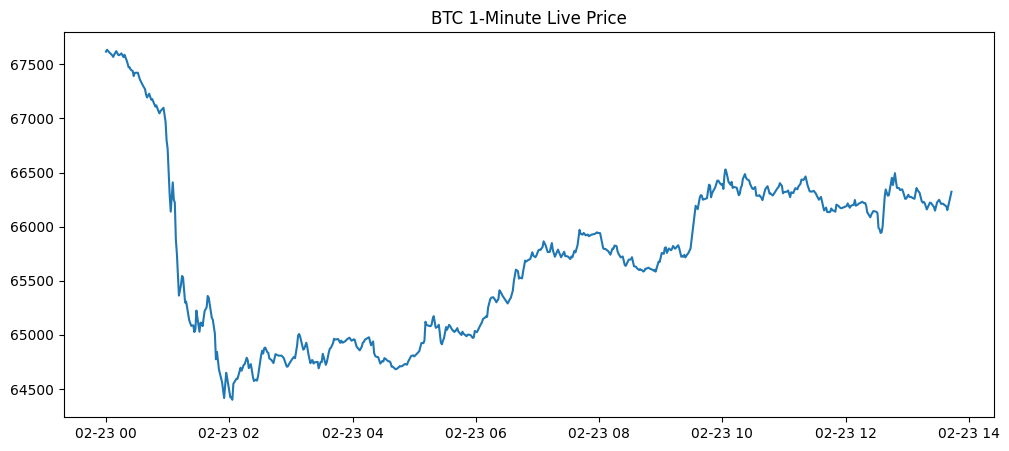

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(series)
plt.title("BTC 1-Minute Live Price")
plt.show()

In [15]:
seq_length = 15

In [16]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

values = series.values.reshape(-1,1)

split = int(len(values)*0.8)

train = values[:split]
test = values[split:]

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [17]:
def create_sequences(data, seq_length=15):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled)
X_test, y_test = create_sequences(test_scaled)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1],1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=5, batch_size=16)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0451
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0033
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0031
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0032


In [19]:
pred = model.predict(X_test)

pred = scaler.inverse_transform(pred)
y_test_actual = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step


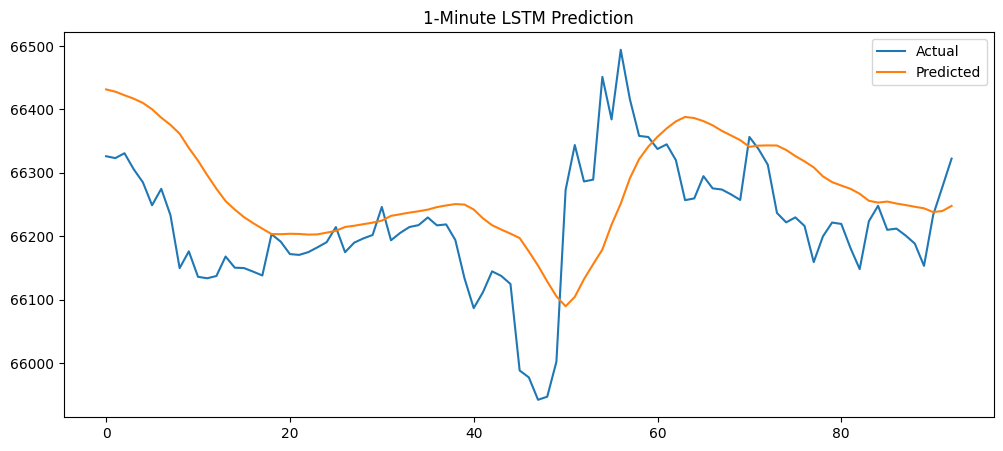

In [20]:
plt.figure(figsize=(12,5))
plt.plot(y_test_actual, label="Actual")
plt.plot(pred, label="Predicted")
plt.legend()
plt.title("1-Minute LSTM Prediction")
plt.show()

In [ ]:
btc['Returns'] = btc['Close'].pct_change()
btc['MA_7'] = btc['Close'].rolling(7).mean()
btc['MA_30'] = btc['Close'].rolling(30).mean()   
btc['Volatility'] = btc['Returns'].rolling(7).std()

btc.dropna(inplace=True)

In [29]:
if btc['MA_7'].iloc[-1] > btc['MA_30'].iloc[-1]:
    signal = "BUY"
else:
    signal = "SELL"
if btc['Volatility'].iloc[-1] > 0.02:  # Example threshold
    risk = "HIGH"